Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

# Week 8 - Classification

This week's assignment will give you an opportunity to practice your classification skills with the scikit-learn package. You will have to apply several different classification methods and learn about their parameters.

In sklearn the different options (called hyperparameters) for each classifier are specofied in the constructor when you initialize an object. Then, method __.fit(X, y)__ will run the training procedure where the classifier will learn from a set of samples and their features in __X__ and the corresponding class labels in __y__. Once the classifier model is trained you can use it for predicting the labels on previously unseen data with __.predict(X_new)__.

You will need to use various classification metrics to __evaluate the performance of the trained model__. See http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics for more details.

A balanced F1 score combining precision and recall is a good default performance measure for binary classifiers. However, for instance as in the example with handwritten digits - the problem is multiclass - where we have 10 classes, one for each digit. In extending a binary metric to multiclass or multilabel problems, it could be treated as a collection of binary problems, one for each class. It is, therefore, necessary to average the evaluation results. There is then a number of ways to average binary metric calculations across the set of classes, each of which may be useful in some scenario. Where available, you should select among these using the average parameter. Read more about __"micro" and "macro" averaging of classification metrics__ in scikit-learn documentation.

"macro" simply calculates the mean of the binary metrics, giving equal weight to each class. In problems where infrequent classes are nonetheless important, macro-averaging may be a means of highlighting their performance. On the other hand, the assumption that all classes are equally important is often untrue, such that macro-averaging will over-emphasize the typically low performance on an infrequent class.

Thus if we make sure that each digit is represented by approximately equal number of samples, the performance of a classifier will be best evaluated using F1 with macro averaging across the classes. __StratifiedKfold__ class or a stratified train_test_split() can be used to make sure each class gets an approximately equal number of samples in a random split.

The final, and probably, one of most important aspects of machine learning covered by this assignment - is to __avoid overfitting the models while they train__. Overfitting leads to a classifier that is showing excellent performance on the dataset used for training, while its performance on a previously unseen dataset could be average if not poor. __Cross-validation__ is an important technique to master. Fortunately, even the complex scenarios of cross-validation are already implemented and available for use in sklearn.

Often we need to choose between several classification models based on their performance, for instance the classifiers initialized with different hyperparameters, we need to make sure there is no overfitting of hyperparameters. It means that the choise of hyperparameters can be optimal for the training dataset but may not be optimal in general. __GridSearchCV__ class simplifies the hyperparameter optimization procedure, but you need to make sure to put aside a subset of your data for the final validation. __train_test_split()__ is the best way to split the dataset in sklearn.

There is a lot to explore in scikit learn documentation, take this opportunity, and ask your questions on Slack channel #week8 if something is unclear.

Due to a heavy use of randomization techniques the exact performance mertics may not be achieved (sometimes even with the random seed set) therefore the tests in assert statements will  validate your solutions roughly. Don't be surprised to get slightly different results when you restart your calculations.


## Assignments

There are 5 graded assignments and total 6 points: the first task is worth 2 points, the other four are 1 point each. Additionally, there is an ungraded assignment that we highly encourage you to solve.


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Task #1  (2 points) - KNN

Implement your own version of Nearest Neighbor classifier as a class MyKNN. The only hyperparameter to \_\_init\_\_(self, K) is K - the number of neighbors.

Implement  .fit(X, y) method. There is no real training as the model simply memorizes all the data samples and their class labels.

Implement .predict(X_new) method; this is where all the calculations are. You need to compare each sample in X_new to the memorized data and choose the K nearest neighbors using euclidean distance. Then you need to predict the label based on the most frequent label of the K neighbors and return an array of predicted labels. The problem could be binary or multiclass, it does not matter for the implementation, however you predict only one label for each sample, so it is not a multilabel classification problem.

Do not worry about memory or speed optimization, we will not use MyKNN on large datasets.

In [29]:
import numpy as np
from scipy.spatial import distance

class MyKNN():
    """
    Nearest neighbor classifier
    """
    
    def __init__(self, K):
        """
        Initiate instance of the classifier with K nearest neighbors
        """
        self.K = K
    
    def fit(self, X, y):
        """
        Fit the model. Simply "memorize" the training data. 
        """
        self.X = X
        self.y = y
        
    def __distance(self, X_new_sample):
        """
        Find distance between one sample and other points
        """
        euclid_distances = []
        # Calculate euclidean distance in 2D
        for i in range(len(self.X)):
            euclid_distances.append(distance.euclidean(self.X[i], X_new_sample))
         
        indices = np.argpartition(euclid_distances, self.K - 1, axis = 0) # The distance indices correspond to the indices of the
        # nearest neighbors
        # np.argpartition returns indices of smallest elements. These are the k nearest neighbors
        predicted_labels = self.y[indices[:self.K]] # These are the predicted labels of the k nearest neighbors.
        return(np.bincount(predicted_labels).argmax()) # Return the most frequent label
        
    def predict(self, X_new):
        """
        Find nearest neighbors, using euclidean distance to choose neighbors. Implements __distance method
        to avoid nested for loop
        """
        predicted_labels = []
        # could use .cdist() but alas it was not to be
        for i in X_new:
            predicted_labels.append(self.__distance(i))
            # .__distance calculates distance between one sample in X_new and all other points
        return(predicted_labels)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

###### Synthetic example  ###############################
# 6 samples, 2 features, binary class labels

X = np.array([
    [1.0, 2.5],
    [3.5, 4.5],
    [6.5, 6.5],
    [4.5, 1.5],
    [5.5, 3.0],
    [7.5, 3.5]])
y = np.array([0,0,0,1,1,1])

#### K = 1 ###############

cls = MyKNN(1)
cls.fit(X, y)

ref_cls = KNeighborsClassifier(1)
ref_cls.fit(X, y)

#### Prediction for the same dataset with K=1 should give accuracy 100%
assert accuracy_score(y, ref_cls.predict(X)) == 1.
assert accuracy_score(y, cls.predict(X)) == 1.


#### K = 3 ###############
cls = MyKNN(3)
cls.fit(X, y)

ref_cls = KNeighborsClassifier(3)
ref_cls.fit(X, y)

#### Prediction for the same dataset as used in training may not give you excellent results for K > 1
assert accuracy_score(y, ref_cls.predict(X)) == 5./6.
assert accuracy_score(y, cls.predict(X)) == 5./6.

#### In this test we create a perturbation in input data
# that should affect prediction accuracy
assert accuracy_score(y, ref_cls.predict(X * 0.5)) == 3./6.
assert accuracy_score(y, cls.predict(X * 0.5)) == 3./6.

##### Iris dataset ##############################################
# 150 samples, 4 features
# 3 classes, 50 samples per class
from sklearn.datasets import load_iris

X_iris, y_iris = load_iris(return_X_y=True)
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, stratify=y_iris)
cls_iris = MyKNN(5)
cls_iris.fit(X_iris_train, y_iris_train)

ref_cls_iris = KNeighborsClassifier(5)
ref_cls_iris.fit(X_iris_train, y_iris_train)
assert accuracy_score(y_iris_test, ref_cls_iris.predict(X_iris_test)) >= 0.9
assert accuracy_score(y_iris_test, cls_iris.predict(X_iris_test)) >= 0.9

## Task 2  (1 point) - Sampling

Analyze stability of features in subsamples in train_test_split().
Take the wines dataset (loaded below), and plot a distribution of "quality" feature. You will see that for wine quality __&lt;5 and &gt;7__ we only have a few samples; exclude these samples from wines dataset. Define __y__ as a vector of wine quality class labels. Define __X__ as the matrix of samples with the rest of the features (excluding quality).

Run 1000 iterations of train_test_split() subsampling from __X__ and __y__ stratified by __y__ with 30% test size.

Create __avg_alcohol_values_train__ list and append mean values of "alcohol" feature in the training subset on each iteration.

Create __avg_alcohol_values_test__ list and append mean values of "alcohol" feature in the testing subset on each iteration.

Analyze the mean and standard deviation of values in each of the lists. Plot histograms for visual aid.
Think about why standard deviations of mean values from test and train samples differ and why the means are equal.

The automatic tests will be checking X, y, and the avg_alcohol... lists.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


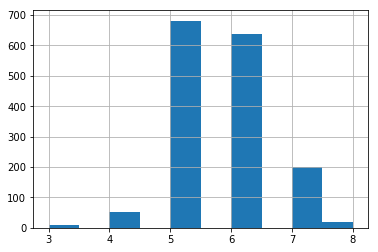

In [31]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wines = pd.read_csv(url, sep=";")
wines["quality"].hist()
wines.head()

In [32]:
# wines.loc[wines["quality"] == 7] # see if there are values where quality equals 7. 
wines = wines.query("quality != [3, 4, 8]")
# or
# wines = wines[(wines.quality <= 7) & (wines.quality >= 5)]
#X = wines.loc[:, wines.columns != "quality"]
# Useful ref: https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
y = wines["quality"]
X = wines.drop("quality", axis = 1)

Training standard deviation: 0.0150646766956
Testing standard deviation: 0.0350848391464
Training mean: 10.4110699153
Testing mean: 10.4133634868


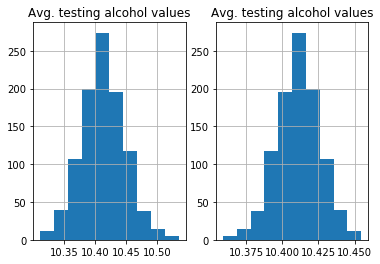

In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

def model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y)
    avg_alcohol_values_train.append(X_train["alcohol"].mean())
    avg_alcohol_values_test.append(X_test["alcohol"].mean())
    
avg_alcohol_values_train = []
avg_alcohol_values_test = []

for i in range(1000):
    model(X,y)

# My testing:
print("Training standard deviation:", np.std(avg_alcohol_values_train))
print("Testing standard deviation:", np.std(avg_alcohol_values_test))
print("Training mean:", np.mean(avg_alcohol_values_train))
print("Testing mean:", np.mean(avg_alcohol_values_test))

fig, (ax1, ax2) = plt.subplots(1,2)
pd.Series(avg_alcohol_values_test).hist(ax=ax1)
pd.Series(avg_alcohol_values_train).hist(ax=ax2)
ax1.set_title("Avg. testing alcohol values")
ax2.set_title("Avg. testing alcohol values")

plt.show()


In [34]:
assert y.shape == (1518,)
assert X.shape == (1518, 11)

assert 0.034 <= round(pd.Series(avg_alcohol_values_test).std(), 3) <= 0.037
assert round(pd.Series(avg_alcohol_values_test).mean(), 1) == round(pd.Series(avg_alcohol_values_train).mean(), 1)

assert 0.014 <= round(pd.Series(avg_alcohol_values_train).std(), 3) <= 0.016
assert round(pd.Series(avg_alcohol_values_train).mean(), 1) == round(wines['alcohol'].mean(), 1)

## Task 3 (1 point) - Multinomial NB

Use RepeatedStratifiedKfold cross-validation to evaluate performance of a Multinomial Naive Bayes on the wine dataset predicting wine quality. As in the previous task exclude wines with quality that is not 5,6 or 7; and prepare sample-feature matrix X and vector with class labels y accordingly.

Use the following classesfrom sklearn:  RepeatedStratifiedKFold, MultinomialNB and cross_val_score function.

Initialize Repeated 5-fold cross validation object (5 splits) with 1000 repetitions.
Initialize Multinomial NB classifier.
Calculate cross validation scores for the NB classifier and the kfold cross validation object that we created (use cv parameter to pass a custom cross validation object to cros_val_score function). For scoring use F1 score with macro averageing 'f1_macro'. If you want to speed things up set n_jobs=-1  which would use the power of multiple CPU cores on your computer for the calculation.

Store the results of cross validation scores in "scores" variable. We will check it in assert tests, as well as X and y will be tested.

For visual aid plot a distribution of scores across cross validation runs. Now you have a robust estimate of Multinomial NB classifier performance in predicting wine quality.

In [35]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wines = pd.read_csv(url, sep=";")

In [36]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wines = pd.read_csv(url, sep=";")
wines = wines.query("quality != [3, 4, 8]")
y = wines["quality"]
X = wines.drop("quality", axis = 1)

In [60]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
import timeit

rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 100, random_state = 121222)
# http://scikit-learn.org/stable/modules/cross_validation.html
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html
# Repeats Stratified K-Fold n times with different randomization in each repetition.
# Simple explanation on cross validation
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

mnb = MultinomialNB()
scores = cross_val_score(mnb, X, y, cv = rskf, scoring = "f1_macro", n_jobs = -1) 
# F score is a combination of precision and recall.
# scores will contain a score for each split as generated by rskf. 

scores_test = []
# What is rskf doing?
# something like this:
for train_index, test_index in rskf.split(X, y): # The rskf object is an iterable with all splits.
    mnb = MultinomialNB()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mnb.fit(X_train, y_train)
    y_predictions = mnb.predict(X_test)
    scores_test.append(f1_score(y_test, y_predictions, average = "macro"))
    
print("Testing scoring in loop:", np.mean(scores_test))
print("Testing scoring with rskf object:", np.mean(scores))
# Yay its the same

# what time difference does n_jobs make?

def time_test():
    score = cross_val_score(mnb, X, y, cv = rskf, scoring = "f1_macro")
    return score

def time_test_2():
    score = cross_val_score(mnb, X, y, cv = rskf, scoring = "f1_macro", n_jobs = -1)
    return score
print("Speed (s) with default n_job setting:", timeit.timeit(stmt = time_test, number = 1)) 
print("And using n_jobs = -1:", timeit.timeit(stmt = time_test_2, number = 1)) 

Testing scoring in loop: 0.449547201683
Testing scoring with rskf object: 0.449547201683
Speed (s) with default n_job setting: 1.1804117549982038
And using n_jobs = -1: 0.8175660980014072


In [61]:
assert y.shape == (1518,)
assert X.shape == (1518, 11)
assert  .4 < pd.Series(scores).mean() < .5

## Task 4 (1 point) - Logistic Regression

Use RepeatedStratifiedKfold cross-validation to evaluate performance of a Logistic Regression on the wine dataset predicting wine quality. 

This time let us turn it into a binary classification problem and prepare a vector with class labels y that will only have 1 (for high-quality wine where quality >= 7) and 0 for the rest of wine samples.
Initialize sample-feature matrix X (don't forget to exclude quality column).

Use the following classesfrom sklearn:  RepeatedStratifiedKFold, LogisticRegression and cross_val_score function.

As in the previous example: 

Initialize Repeated 5-fold cross validation object (5 splits) with 1000 repetitions.
Initialize Logistic Regression classifier.
Calculate cross validation scores for the Logistic Regression classifier and the kfold cross validation object that we created (use cv parameter to pass a custom cross validation object to cros_val_score function).

However, for scoring let us use accuracy this time, and since it is a binary classification problem no averageing across classes is required. If you want to speed things up set n_jobs=-1  which would use the power of multiple CPU cores on your computer for the calculation.

Store the results of cross validation scores in "scores" variable. We will check it in assert tests, as well as X and y will be tested.

For visual aid plot a distribution of scores across cross validation runs.

In [30]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wines = pd.read_csv(url, sep=";")

In [31]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wines = pd.read_csv(url, sep=";")

# Old way:
# wines.loc[wines["quality"] < 7, "quality"] = 0
# wines.loc[wines["quality"] >= 7, "quality"] = 1
# But a better way is

y = pd.Series(np.where(wines["quality"] >= 7, 1, 0))
X = wines.drop("quality", axis = 1)

rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1000, random_state = 1)
# For different types of scoring...
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

lr = LogisticRegression()

scores = cross_val_score(lr, X, y, cv = rskf, n_jobs = -1) 
# setting cv = rskf allows cross validation to 
# take care of using the rskf class. Basically fivides cross_val_score for the data.
# The first argument is the model to use. Second is data to fit model to. Third is class labels.`

In [32]:
assert y.shape == (1599,)
assert X.shape == (1599, 11)
assert  pd.Series(scores).mean() > 0.86

## Task 5 (1 point) - Random Forest

Let us use the digits dataset and apply Random Forest to predict the digit given a low resolution handwritten image.

Use the following classes from sklearn:  RandomForestClassifier

You will need to split data into training and 30% testing. Use training to fit RandomForestClassifier. And use testing subset to test the f1 score with macro averaging: first, predict the labels for test set using .predict(), then compare predicted to actual labels and calculate the score. Store this score in "score" variable, we will test it.

Now let us compare the results to a robust estimate of performance using 5-fold cross validation (5 splits) with 100 repetitions (more repetitions will take time). Calculate 'f1_macro'  scores with cross validation for the whole dataset of X and y (not the training or testing subsets). Store the results of cross validation scores in "scores" variable (it will be tested). Let us now take the mean of "scores" and compare it to "score" that we calculated previously. What do you see?
For visual aid plot distributions of scores across cross validation runs.

In [35]:
import sklearn.datasets

digits = sklearn.datasets.load_digits()

# X - how digits are handwritten
X = digits['data']

# y - what these digits actually are
y = digits['target']

0.948520500932


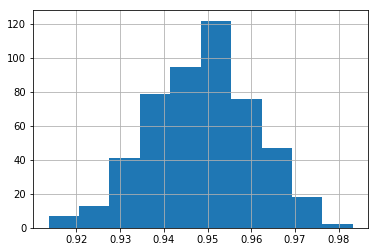

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y)
clf.fit(X_train, y_train)
predicted_labels = clf.predict(X_test)
score = f1_score(y_test, predicted_labels, average = 'macro')

rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 100, random_state = 1)
scores = cross_val_score(clf, X, y, cv = rskf, n_jobs = -1, scoring = "f1_macro") 
print(np.mean(scores))

pd.Series(scores).hist()
plt.show()

In [37]:
assert X.shape == (1797, 64)
assert y.shape == (1797, )
assert score > 0.91
assert np.percentile(scores, 5) < score < np.percentile(scores, 95)

## Task 6 (not graded) - Grid SearchCV

Apply KNN classifier to digits dataset. You need to find the optimal parameters for KNN.
Number of neighbors is not the only parameter that can be changed. As you can see from the first exercise the distance metric is an important parameter. Also, when choosing the class label by voting between K nearest neigbors different weights could be assigned to samples. A popular choice would be to assign higher weights to neighbors that are closer.

Split the dataset into train_test and validation and only use the train_test portion for grid search CV.
Use Grid Search cross validation to find the optimal combination of parameters listed below:

n_neighbors:  3, 5, 7, 9, 11, 13, 15
weights: uniform, distance
metric: euclidean, manhattan, chebyshev

In order to define what is an optimal solution you need to choose a score. The choice is up to you, but remember that digits dataset involves multiple classes. There is no assert test.

You will need grid.best_params_ and grid.best_estimator_

Use the best performing classifier grid.best_estimator_ to predict values for the validation portion of your dataset. Print a confusion matrix (use confusion_matrix function) and analyze which digits are easily confused with the other ones by the classifier.

If you have questions about the solution mark them clearly and we will answer in okpy grading system.

In [2]:
import sklearn.datasets

digits = sklearn.datasets.load_digits()

# X - how digits are handwritten
X = digits['data']

# y - what these digits actually are
y = digits['target']

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

knc = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, stratify = y)
#knc.fit(X_train, y_train)
#knc.predict(X_test)

parameters = {"n_neighbors": (3, 5, 7, 9, 11, 13, 15), # Does putting values in [] format make a difference?
              "weights": ("uniform", "distance"),
              "leaf_size": (15, 20, 25, 30, 35, 40),
              "metric": ("euclidean", "manhattan", "chebyshev")}
# see here for distance metrics:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
# and all relevant grid search info:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.predict

grid_search_macro = GridSearchCV(knc, parameters, scoring = "f1_macro")
grid_search_macro.fit(X_train, y_train)
print("Parameters to use:", grid_search_macro.best_estimator_, "\n")
y_pred = grid_search_macro.predict(X_test) # call on estimator with best parameters
print("Confusion matrix using f1 macro scoring \n", confusion_matrix(y_test, y_pred), "\n")

# As stated in intro  by Alex:
# In problems where infrequent classes are nonetheless important, macro-averaging
# may be a means of highlighting their performance. On the other hand, 
# the assumption that all classes are equally important is often untrue, such 
# that macro-averaging will over-emphasize the typically low performance on an infrequent class.
# Basically averages each class

# For fun, what difference does f1_micro make? 
grid_search_micro = GridSearchCV(knc, parameters, scoring = "f1_micro")
grid_search_micro.fit(X_train, y_train)
print("Parameters to use:", grid_search_micro.best_estimator_, "\n")
y_pred = grid_search_micro.predict(X_test)
print("Confusion matrix using f1 micro scoring \n", confusion_matrix(y_test, y_pred))


Parameters to use: KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance') 

Confusion matrix using f1 macro scoring 
 [[54  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  1  0  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 1  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  1]
 [ 0  3  0  0  0  0  0  0 49  0]
 [ 0  0  0  2  1  0  0  0  1 50]] 

Parameters to use: KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance') 

Confusion matrix using f1 micro scoring 
 [[54  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  1  0  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 1  0  0  0